<a href="https://colab.research.google.com/github/benard3360-star/hello-world/blob/main/Weather_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [5]:
data = pd.read_csv("/content/climate3.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [6]:
data.shape

(96453, 12)

In [8]:
data.index

RangeIndex(start=0, stop=96453, step=1)

In [10]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [13]:
data["Apparent Temperature (C)"].unique()

array([ 7.38888889,  7.22777778,  9.37777778, ..., 12.14444444,
        9.73888889,  9.23333333])

In [15]:
data.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [17]:
data.count() #shows total number of normal values

Formatted Date              96453
Summary                     96453
Precip Type                 95936
Temperature (C)             96453
Apparent Temperature (C)    96453
Humidity                    96453
Wind Speed (km/h)           96453
Wind Bearing (degrees)      96453
Visibility (km)             96453
Loud Cover                  96453
Pressure (millibars)        96453
Daily Summary               96453
dtype: int64

In [18]:
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.


In [22]:
data["Wind Speed (km/h)"].value_counts()

Wind Speed (km/h)
3.2200     2441
11.2700    1495
6.4400     1357
0.0000     1297
8.0500      920
           ... 
34.3413       1
45.9333       1
31.5238       1
32.5864       1
41.6990       1
Name: count, Length: 2484, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [25]:

data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [26]:
data["Humidity"].unique() #all unique values in humidity

array([0.89, 0.86, 0.83, 0.85, 0.95, 0.82, 0.72, 0.67, 0.54, 0.55, 0.51,
       0.47, 0.46, 0.6 , 0.63, 0.69, 0.7 , 0.77, 0.76, 0.79, 0.62, 0.66,
       0.8 , 0.78, 0.61, 0.52, 0.4 , 0.37, 0.36, 0.43, 0.5 , 0.53, 0.58,
       0.59, 0.87, 0.93, 0.84, 0.73, 0.71, 0.74, 0.81, 0.9 , 0.99, 0.96,
       0.75, 0.88, 0.65, 0.91, 0.94, 0.92, 0.44, 0.56, 0.68, 0.64, 0.48,
       0.57, 0.98, 1.  , 0.38, 0.41, 0.45, 0.49, 0.32, 0.42, 0.35, 0.39,
       0.97, 0.34, 0.33, 0.31, 0.3 , 0.29, 0.27, 0.28, 0.26, 0.24, 0.25,
       0.23, 0.19, 0.17, 0.2 , 0.15, 0.18, 0.22, 0.14, 0.21, 0.16, 0.13,
       0.  , 0.12])

In [27]:
data["Temperature (C)"].unique() # all unique value in Temperature (C)

array([ 9.47222222,  9.35555556,  9.37777778, ..., 28.47222222,
       28.33888889, 30.60555556])

In [28]:
data["Visibility (km)"].unique()

array([1.58263e+01, 1.49569e+01, 9.98200e+00, 1.12056e+01, 1.14471e+01,
       1.12700e+01, 1.10285e+01, 6.19850e+00, 8.05000e+00, 1.03523e+01,
       6.69760e+00, 9.90150e+00, 5.97310e+00, 1.08031e+01, 1.06743e+01,
       1.08192e+01, 1.07548e+01, 1.08997e+01, 1.08514e+01, 1.10768e+01,
       1.08836e+01, 7.61530e+00, 2.65650e+00, 3.81570e+00, 4.49190e+00,
       4.44360e+00, 5.68330e+00, 3.10730e+00, 3.20390e+00, 1.40553e+01,
       6.11800e+00, 6.16630e+00, 7.96950e+00, 6.34340e+00, 1.05455e+01,
       1.49086e+01, 1.50052e+01, 1.58746e+01, 1.00464e+01, 1.00303e+01,
       1.19784e+01, 1.41680e+01, 5.92480e+00, 1.22360e+00, 7.21280e+00,
       1.11251e+01, 1.33791e+01, 1.13988e+01, 1.12861e+01, 1.56975e+01,
       1.48764e+01, 6.84250e+00, 1.53594e+01, 4.29870e+00, 4.12160e+00,
       4.76560e+00, 2.93020e+00, 5.84430e+00, 9.61170e+00, 9.67610e+00,
       2.01250e+00, 5.21640e+00, 1.45866e+01, 1.56009e+01, 1.47154e+01,
       6.11800e-01, 3.63860e+00, 1.11090e+00, 5.15200e-01, 4.347

In [29]:
data["Visibility (km)"].nunique()

949

In [30]:
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.


In [32]:
data["Wind Bearing (degrees)"].nunique()

360

In [40]:
data["Daily Summary"].value_counts()

Daily Summary
Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.      

In [50]:
data.groupby("Daily Summary").get_group("Partly cloudy starting in the morning.")

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
408,2006-04-25 00:00:00.000 +0200,Clear,rain,12.711111,12.711111,0.89,3.2522,169,15.8263,0,1020.11,Partly cloudy starting in the morning.
409,2006-04-25 01:00:00.000 +0200,Clear,rain,12.127778,12.127778,0.89,3.1717,148,14.9086,0,1020.12,Partly cloudy starting in the morning.
410,2006-04-25 02:00:00.000 +0200,Clear,rain,11.811111,11.811111,0.84,4.9910,68,14.9569,0,1018.38,Partly cloudy starting in the morning.
411,2006-04-25 03:00:00.000 +0200,Clear,rain,12.016667,12.016667,0.80,6.2629,169,14.9086,0,1019.91,Partly cloudy starting in the morning.
412,2006-04-25 04:00:00.000 +0200,Clear,rain,12.044444,12.044444,0.80,6.4239,187,14.8120,0,1020.03,Partly cloudy starting in the morning.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


In [59]:
data[data["Daily Summary"] == "Partly cloudy starting in the morning."]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
408,2006-04-25 00:00:00.000 +0200,Clear,rain,12.711111,12.711111,0.89,3.2522,169,15.8263,0,1020.11,Partly cloudy starting in the morning.
409,2006-04-25 01:00:00.000 +0200,Clear,rain,12.127778,12.127778,0.89,3.1717,148,14.9086,0,1020.12,Partly cloudy starting in the morning.
410,2006-04-25 02:00:00.000 +0200,Clear,rain,11.811111,11.811111,0.84,4.9910,68,14.9569,0,1018.38,Partly cloudy starting in the morning.
411,2006-04-25 03:00:00.000 +0200,Clear,rain,12.016667,12.016667,0.80,6.2629,169,14.9086,0,1019.91,Partly cloudy starting in the morning.
412,2006-04-25 04:00:00.000 +0200,Clear,rain,12.044444,12.044444,0.80,6.4239,187,14.8120,0,1020.03,Partly cloudy starting in the morning.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


In [51]:
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.


In [53]:
data.groupby("Wind Speed (km/h)").get_group(14.2646)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
663,2006-04-07 15:00:00.000 +0200,Partly Cloudy,rain,11.061111,11.061111,0.46,14.2646,337,11.2056,0,1015.24,Mostly cloudy until evening.
996,2006-08-02 12:00:00.000 +0200,Mostly Cloudy,rain,23.844444,23.844444,0.69,14.2646,301,11.2700,0,1009.41,Mostly cloudy throughout the day.
1581,2006-12-13 21:00:00.000 +0100,Foggy,snow,0.000000,-4.255556,0.96,14.2646,210,0.3220,0,1035.71,Foggy throughout the day.
2035,2006-12-30 19:00:00.000 +0100,Clear,snow,-1.655556,-6.288889,0.92,14.2646,119,5.7960,0,1037.80,Foggy starting overnight continuing until morn...
...,...,...,...,...,...,...,...,...,...,...,...,...
89047,2016-08-06 10:00:00.000 +0200,Mostly Cloudy,rain,22.511111,22.511111,0.72,14.2646,301,9.9820,0,1016.14,Partly cloudy throughout the day.
90567,2016-02-09 18:00:00.000 +0100,Partly Cloudy,rain,11.183333,11.183333,0.70,14.2646,152,16.1000,0,1009.12,Mostly cloudy throughout the day.
92269,2016-06-17 16:00:00.000 +0200,Partly Cloudy,rain,28.938889,30.633333,0.58,14.2646,296,10.2557,0,1009.88,Mostly cloudy throughout the day.
93350,2016-03-30 18:00:00.000 +0200,Mostly Cloudy,rain,17.850000,17.850000,0.52,14.2646,221,16.1000,0,1017.04,Mostly cloudy throughout the day.


In [55]:
data["Wind Speed (km/h)"] == 14.2646

0        False
1         True
2        False
3        False
4        False
         ...  
96448    False
96449    False
96450    False
96451    False
96452    False
Name: Wind Speed (km/h), Length: 96453, dtype: bool

In [58]:
data[data["Wind Speed (km/h)"] == 14.2646]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
663,2006-04-07 15:00:00.000 +0200,Partly Cloudy,rain,11.061111,11.061111,0.46,14.2646,337,11.2056,0,1015.24,Mostly cloudy until evening.
996,2006-08-02 12:00:00.000 +0200,Mostly Cloudy,rain,23.844444,23.844444,0.69,14.2646,301,11.2700,0,1009.41,Mostly cloudy throughout the day.
1581,2006-12-13 21:00:00.000 +0100,Foggy,snow,0.000000,-4.255556,0.96,14.2646,210,0.3220,0,1035.71,Foggy throughout the day.
2035,2006-12-30 19:00:00.000 +0100,Clear,snow,-1.655556,-6.288889,0.92,14.2646,119,5.7960,0,1037.80,Foggy starting overnight continuing until morn...
...,...,...,...,...,...,...,...,...,...,...,...,...
89047,2016-08-06 10:00:00.000 +0200,Mostly Cloudy,rain,22.511111,22.511111,0.72,14.2646,301,9.9820,0,1016.14,Partly cloudy throughout the day.
90567,2016-02-09 18:00:00.000 +0100,Partly Cloudy,rain,11.183333,11.183333,0.70,14.2646,152,16.1000,0,1009.12,Mostly cloudy throughout the day.
92269,2016-06-17 16:00:00.000 +0200,Partly Cloudy,rain,28.938889,30.633333,0.58,14.2646,296,10.2557,0,1009.88,Mostly cloudy throughout the day.
93350,2016-03-30 18:00:00.000 +0200,Mostly Cloudy,rain,17.850000,17.850000,0.52,14.2646,221,16.1000,0,1017.04,Mostly cloudy throughout the day.


In [61]:
#null value in the data
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [64]:
data.notnull().sum()

Formatted Date              96453
Summary                     96453
Precip Type                 95936
Temperature (C)             96453
Apparent Temperature (C)    96453
Humidity                    96453
Wind Speed (km/h)           96453
Wind Bearing (degrees)      96453
Visibility (km)             96453
Loud Cover                  96453
Pressure (millibars)        96453
Daily Summary               96453
dtype: int64

In [65]:
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.


In [71]:
#Rename Daily Summary to Daily Weather Summary
data.rename(columns ={"Daily Summary" : "Daily Weather Summarry"})

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Weather Summarry
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


In [72]:
data.rename(columns = {"Daily Summary" : "Daily Weather Summary"}, inplace = True)

In [73]:
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Weather Summarry
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.


In [77]:
#mean of temperature
data.Humidity.mean()

0.7348989663359355

In [83]:
data.Humidity.std()

0.1954727390672154

In [87]:
data["Apparent Temperature (C)"].std()

10.696847392128161

In [88]:
data["Wind Bearing (degrees)"].std()

107.38342838070584

In [89]:
data["Visibility (km)"].std()

4.192123191422782

In [91]:
data["Apparent Temperature (C)"].var() #variance

114.42254413047903

In [92]:
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Weather Summarry
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.


In [96]:
db = data[["Precip Type",	"Temperature (C)",	"Apparent Temperature (C)",	"Humidity",	"Wind Speed (km/h)",	"Wind Bearing (degrees)",	"Visibility (km)",	"Loud Cover",	"Pressure (millibars)"]]
db.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51


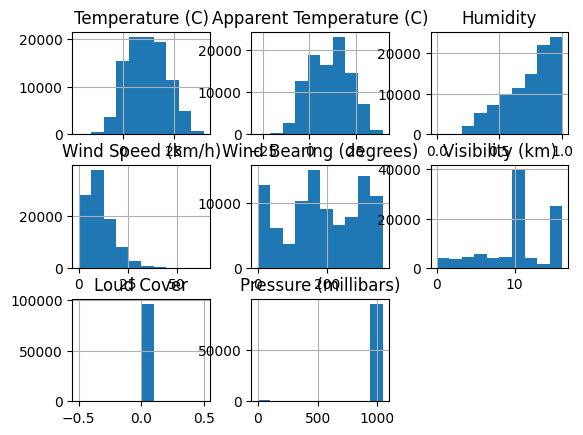

In [97]:
win = db[["Temperature (C)",	"Apparent Temperature (C)",	"Humidity",	"Wind Speed (km/h)",	"Wind Bearing (degrees)",	"Visibility (km)",	"Loud Cover",	"Pressure (millibars)"]]
win.hist()
plt.show()

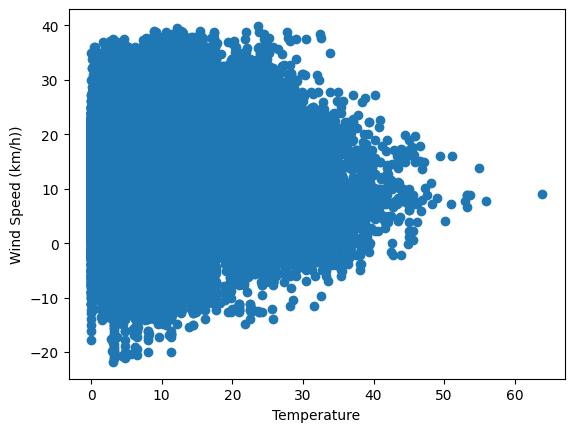

In [103]:
plt.scatter(db["Wind Speed (km/h)"],db["Temperature (C)"])
plt.xlabel("Temperature")
plt.ylabel("Wind Speed (km/h))")
plt.show()

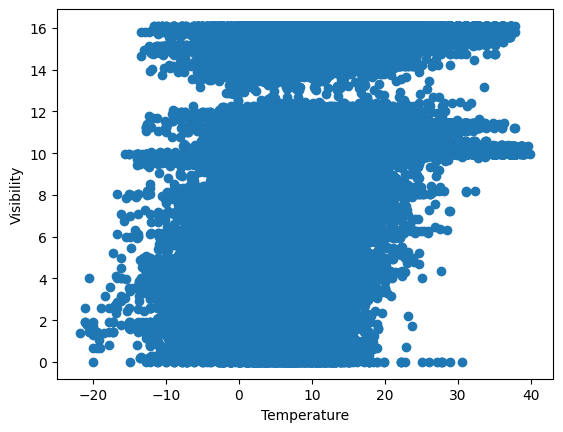

In [104]:
plt.scatter(db["Temperature (C)"],db["Visibility (km)"])
plt.xlabel("Temperature")
plt.ylabel("Visibility")
plt.show()

In [109]:
msk = np.random.rand(len(data)) < 0.8

In [110]:
msk

array([ True,  True,  True, ...,  True, False, False])

In [111]:
len(msk)

96453

In [114]:
count = 0
for p in range(len(msk)):
  if (msk[p] == True):
    count = count + 1
print(count)

77182


In [115]:
train = db[msk] #80% of the records
test = db[~msk] #20% of the records

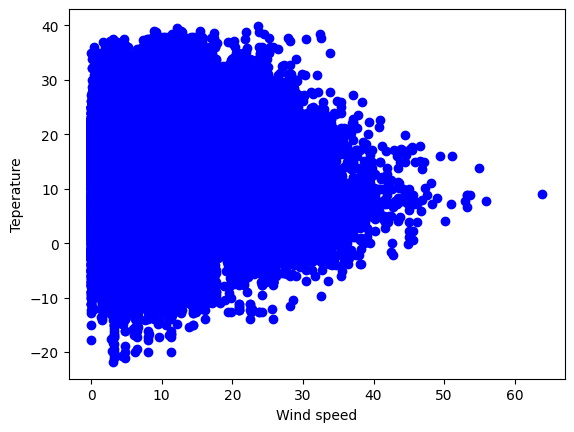

In [118]:
plt.scatter(train["Wind Speed (km/h)"], train["Temperature (C)"],  color='blue')
plt.xlabel("Wind speed")
plt.ylabel("Teperature")
plt.show()

In [119]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['Wind Speed (km/h)']])
train_y = np.asanyarray(train[['Temperature (C)']])

regr.fit(train_x, train_y) # train the linear model
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00818298]]
Intercept:  [11.8308602]


Text(0, 0.5, 'Temperature')

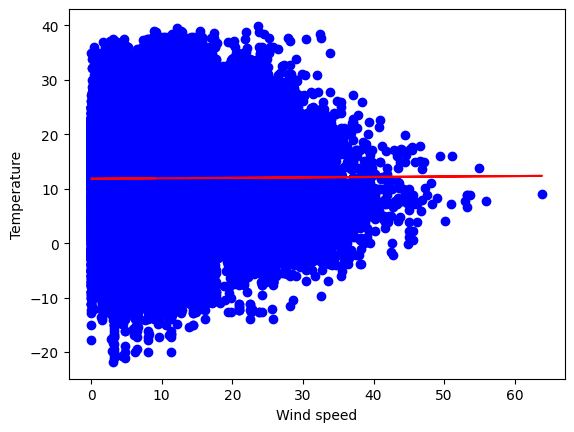

In [120]:
plt.scatter(train['Wind Speed (km/h)'], train["Temperature (C)"],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Wind speed")
plt.ylabel("Temperature")